[[80  0]
 [ 4 12]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        80
         1.0       1.00      0.75      0.86        16

    accuracy                           0.96        96
   macro avg       0.98      0.88      0.92        96
weighted avg       0.96      0.96      0.96        96



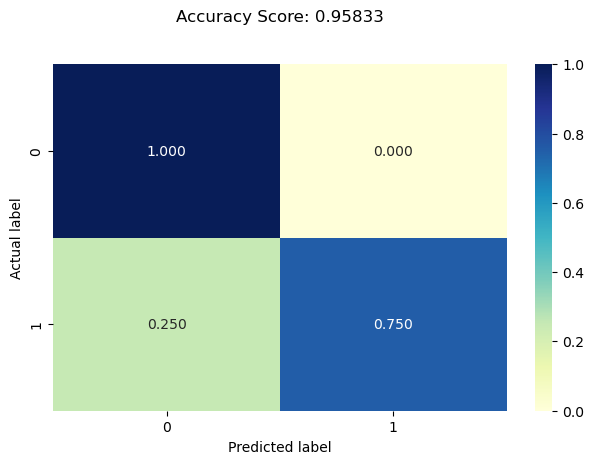

C:\Users\sweth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sweth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

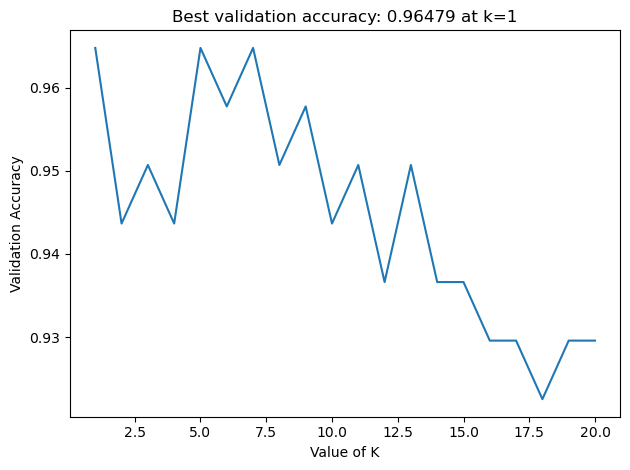

C:\Users\sweth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy of KNN classifier on test set: 0.91667
Accuracy of GP classifier on test set: 0.95833
Accuracy of GNB classifier on test set: 0.91667
Accuracy of MLP classifier on test set: 0.96875


C:\Users\sweth\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, roc_auc_score, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(1000)

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

data = np.loadtxt("log.csv",delimiter=',')

shufdata = np.random.permutation(data)
x_data = shufdata[:,1:-1]
y_data = shufdata[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, \
                                                    test_size=1 - train_ratio, stratify=y_data) #Shuffle (2nd time) and stratified to take care of class imbalance
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, \
                                                test_size=test_ratio/(test_ratio + validation_ratio),stratify=y_test) #Sub-Shuffle (3rd time) and stratified to take care of class imbalance

scaler = preprocessing.StandardScaler().fit(x_train)
x_train_sc = scaler.transform(x_train)
x_val_sc = scaler.transform(x_val)
x_test_sc = scaler.transform(x_test)

logreg = LogisticRegression().fit(x_train_sc, y_train)

y_pred = logreg.predict(x_test_sc)
score = logreg.score(x_test_sc, y_test)
#print('Accuracy of logistic regression classifier on val set: {:.6f}'.format(score))

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))


cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
sns.heatmap(cmn, annot=True, fmt='.3f', cmap="YlGnBu");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = ('Accuracy Score: %.5f' %score)
plt.tight_layout()
plt.title(all_sample_title, y=1.1);
plt.tight_layout()
plt.show()

k_range = range(1,21)
score_knn = np.zeros(max(k_range))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_sc,y_train)
    y_pred_knn = knn.predict(x_val_sc)
    score_knn[k-1]=(accuracy_score(y_val, y_pred_knn))

mxknn = max(score_knn)
indknn = np.argmax(score_knn)+1
plt.figure()
plt.plot(k_range,score_knn)
plt.xlabel("Value of K")
plt.ylabel("Validation Accuracy")
plt.title('Best validation accuracy: {:.5f} at k={}'.format(mxknn,indknn))
plt.tight_layout()
plt.show()

knn = KNeighborsClassifier(n_neighbors=indknn)
knn.fit(x_train_sc,y_train)
y_pred_knn = knn.predict(x_test_sc)
score_knn_test=(accuracy_score(y_test, y_pred_knn))
print('Accuracy of KNN classifier on test set: {:.5f}'.format(score_knn_test))

kernel1 = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel1).fit(x_train_sc,y_train)
y_pred_gpc = gpc.predict(x_test_sc)
score_gpc = gpc.score(x_test_sc,y_test)
print('Accuracy of GP classifier on test set: {:.5f}'.format(score_gpc))


gnb = GaussianNB().fit(x_train_sc,y_train)
y_pred_gnb = gnb.predict(x_test_sc)
score_gnb = gnb.score(x_test_sc,y_test)
print('Accuracy of GNB classifier on test set: {:.5f}'.format(score_gnb))

mlp = MLPClassifier(hidden_layer_sizes=(10,10)).fit(x_train_sc,y_train)
y_pred_mlp = mlp.predict(x_test_sc)
score_mlp = mlp.score(x_test_sc,y_test)
print('Accuracy of MLP classifier on test set: {:.5f}'.format(score_mlp))